# Predicting Fire Area Damage

For this assignment, we will be using linear regresion to forecase fire area damage. We will leverage the [Forest Fires Data Set](https://archive.ics.uci.edu/ml/datasets/Forest+Fires) to solve this problem. Additional information regarding this work can be found [Cortez and Morais, 2007](http://www3.dsi.uminho.pt/pcortez/fires.pdf).

Attribute information:

   For more information, read [Cortez and Morais, 2007].

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec" 
   4. day - day of the week: "mon" to "sun"
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
   (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform). 

In [1]:
import pandas as pd

df = pd.read_csv('forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [2]:
df.shape

(517, 13)

Question 1.1: Using the [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method, provide the summary statistics of the data

In [3]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


Question 1.2: Apply log(area+1) to the data

In [4]:
import numpy as np

df['area'] = np.log(df.area + 1)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,1.111026
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,1.398436
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.418710
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,2.024193
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,6.995620


Question 2.1: Visually explore the data using pairplot.

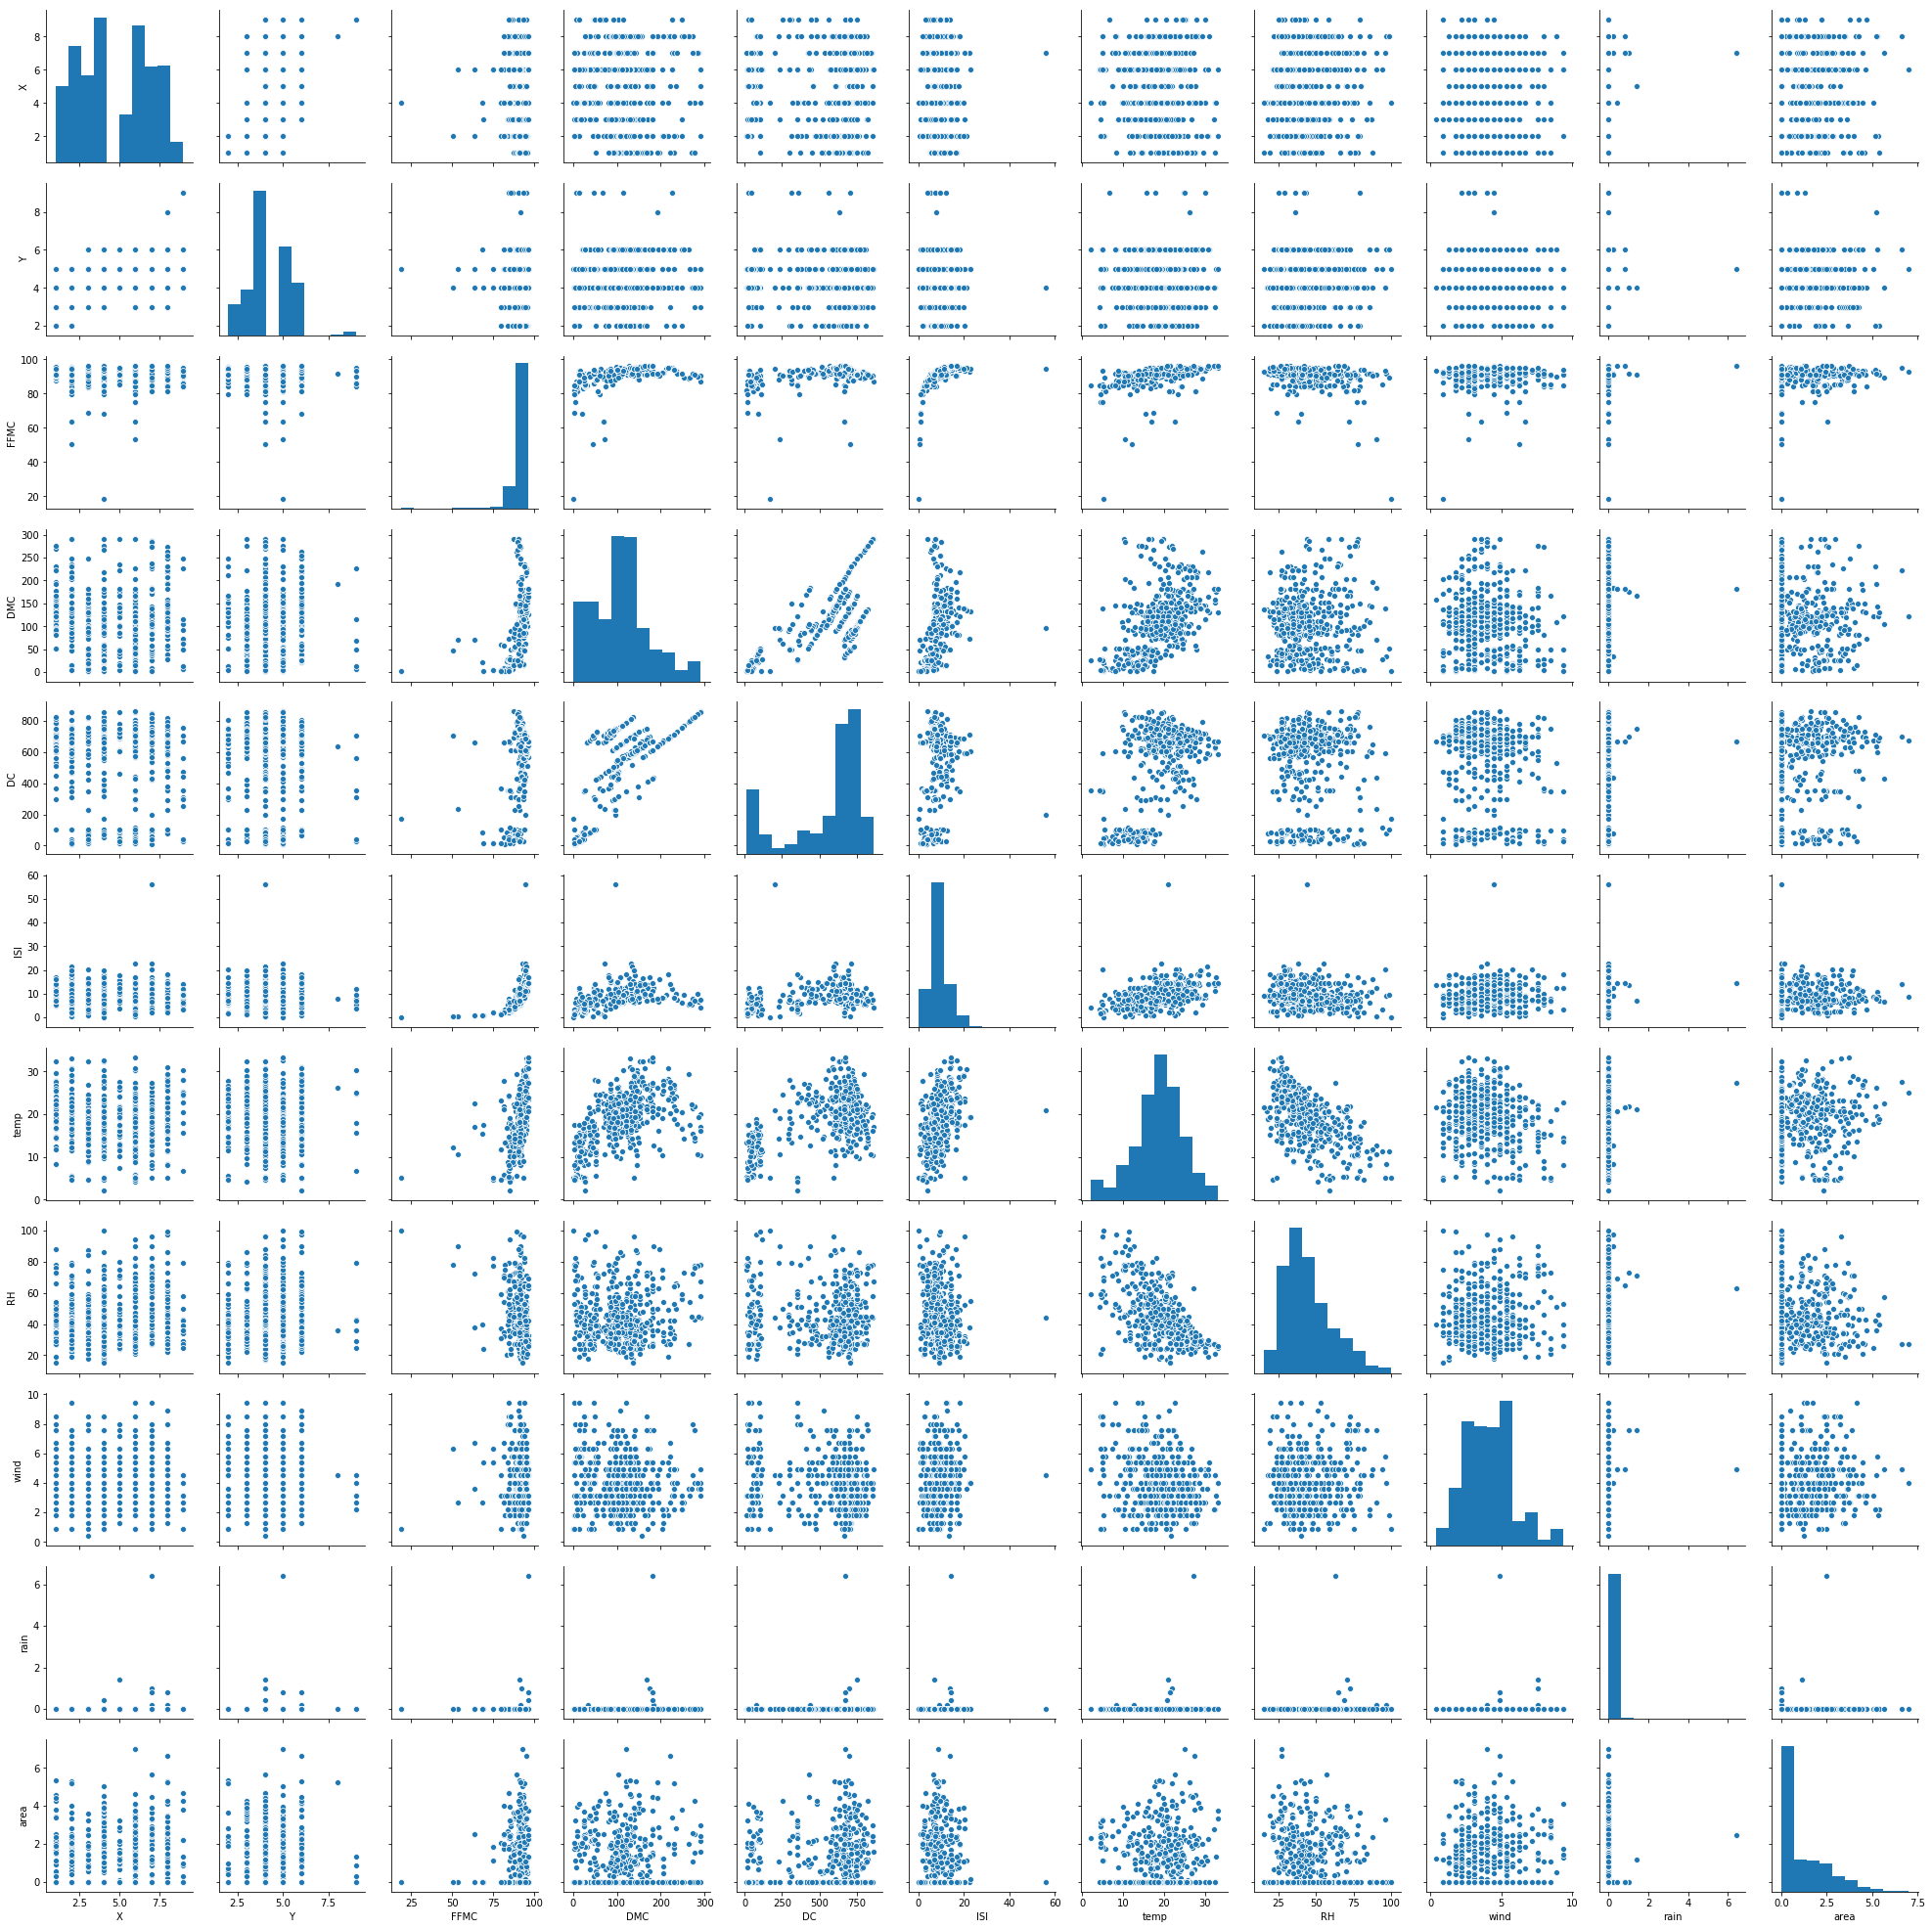

In [8]:
import seaborn as sns

sns.pairplot(df)

Question 2.2: Zoom in at the rain vs area by plotting the scatter plot. What do you conclude?

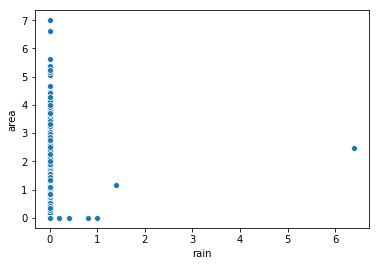

In [9]:
sns.scatterplot(df.rain, df.area)

In almost all cases in our data, there is 0mm of rain during the fire. In the 8 cases in which there is any rainfall at all, 6 of them were fires that had 0 area burned. The remaining two values are so far out of the trend that they seem like possible outliers. Let's look at all of our nonzero rain days to get a better idea.

In [10]:
df[df.rain > 0]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.000000
243,7,4,aug,sun,91.8,175.1,700.7,13.8,21.9,73,7.6,1.0,0.000000
286,7,6,jul,wed,91.2,183.1,437.7,12.5,12.6,90,7.6,0.2,0.000000
499,7,5,aug,tue,96.1,181.1,671.2,14.3,27.3,63,4.9,6.4,2.469793
500,8,6,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.000000
501,7,5,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.000000
502,4,4,aug,tue,96.1,181.1,671.2,14.3,20.7,69,4.9,0.4,0.000000
509,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,1.153732


One perhaps-plausible explanation for why these two fires featured a nonzero burned area despite the rain is that these were both days that were above-average in temperature. But it's also possible that they are simple outliers, perhaps due to quirks of the way that this dataset was produced. Let's try dropping them.

In [11]:
df = df.drop([509, 499])

Question 4.1: Develop a simple linear regression model, relating area with rain and wind only. Calculate the predict values based on test data.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def regression(features, target):
    
    X_train, X_test, y_train, y_test = train_test_split(features,
                                                        target,
                                                        test_size=.3,
                                                        random_state=22
                                
    )
    model = LinearRegression().fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    return model, predictions, y_test

In [25]:
# fit the model
model, predictions, y_test = regression(df[['rain', 'wind']], df['area'])

I always like to inspect the model coefficients to get an idea of how the model assigns predictions.

In [26]:
model.coef_

array([-1.58343178,  0.04540445])

In other words, our model believes that 1 mm increase in rain decreases fire by ~1.58 ha, while a 1 km/h increase in wind speed modestly increases area burned, by ~.05 ha.

Question 4.2: Calculate the mean squared error of predict results.

In [15]:
MSE = mean_squared_error(y_test, predictions)
print(MSE)

1.965487719619096


Question 5.1: Develop a linear regression model, relating area with all features. Calculate the predict values based on test data.

In order to regress the full data, we have to first create dummy variables for the month and day columns, which are both categorical. pandas has a get_dummies method that makes this easy.

In [16]:
days = pd.get_dummies(df.day)
months = pd.get_dummies(df.month)
dummy_df = df.drop(['day', 'month'], axis=1)
dummy_df = pd.concat([dummy_df, days, months], axis=1)
dummy_df.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0


In [17]:
model, predictions, y_test = regression(dummy_df.drop('area', axis=1), dummy_df['area'])

In [18]:
for col, coef in zip(dummy_df.columns, model.coef_):
    print(f'Feature: {col}. Coefficient: {round(coef, 3)}')

Feature: X. Coefficient: 0.025
Feature: Y. Coefficient: -0.031
Feature: FFMC. Coefficient: 0.008
Feature: DMC. Coefficient: 0.005
Feature: DC. Coefficient: -0.002
Feature: ISI. Coefficient: -0.016
Feature: temp. Coefficient: 0.051
Feature: RH. Coefficient: 0.011
Feature: wind. Coefficient: 0.057
Feature: rain. Coefficient: -2.004
Feature: area. Coefficient: -0.18
Feature: fri. Coefficient: 0.117
Feature: mon. Coefficient: 0.319
Feature: sat. Coefficient: -0.045
Feature: sun. Coefficient: -0.237
Feature: thu. Coefficient: 0.287
Feature: tue. Coefficient: -0.26
Feature: wed. Coefficient: -0.564
Feature: apr. Coefficient: 0.094
Feature: aug. Coefficient: 2.311
Feature: dec. Coefficient: 0.285
Feature: feb. Coefficient: -1.328
Feature: jan. Coefficient: 0.128
Feature: jul. Coefficient: -0.357
Feature: jun. Coefficient: -0.375
Feature: mar. Coefficient: -1.884
Feature: may. Coefficient: 0.0
Feature: nov. Coefficient: 0.808
Feature: oct. Coefficient: 0.881


Question 5.2: Calculate the mean squared error of predict results.

In [19]:
MSE = mean_squared_error(y_test, predictions)
print(MSE)

2.205230832014716


Somewhat alarmingly, our MSE has actually increased! This suggests that our new model may be overfitting and that we aren't getting much more information from adding all these features.  

Let's see if we can make a better model. In the cited study, the final model emphasized four features: temperature, rain, wind speed, and relative humidity. Let's try limiting our features to just those 4. 

In [33]:
model, predictions, y_test = regression(df[['rain', 'wind', 'temp', 'RH']], df['area'])
model.coef_

array([-1.73150327,  0.05316881,  0.01087305,  0.00264618])

In [21]:
MSE = mean_squared_error(y_test, predictions)
print(MSE)

1.9590270799402376


Better than the full set, but practically the same as when we only had 2 features.

Finally, I will try fitting with all variables *except* month and day. These two seem, intuitively, to be the most spurious.

In [43]:
model, predictions, y_test = regression(df[['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']], df['area'])
model.coef_

array([ 2.33668591e-02, -8.56704275e-03,  8.92918358e-03,  1.58639272e-03,
        2.93268696e-04, -3.39653833e-02,  8.97575705e-04, -9.54742049e-04,
        7.28517873e-02, -1.69875647e+00])

In [44]:
MSE = mean_squared_error(y_test, predictions)
print(MSE)

1.9341100735061547


So this is our best model yet, by a small margin. We are getting diminishing returns on these added features, but 1.93 is the lowest MSE of all our models.